In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Evaluating data models

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
mines = pd.read_csv(url, header=None)

In [3]:
print(pd.get_option('display.max_columns'))
pd.set_option('display.max_columns', 10)

20


In [4]:
mines.head()

,0,1,2,3,4,...,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,...,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,...,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,...,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,...,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,...,0.0072,0.0048,0.0107,0.0094,R


In [5]:
pd.reset_option('display.max_columns')
pd.get_option('display.max_columns')

20

In [6]:
labels = mines[60]
mines = mines.iloc[:, :60]

### The dataset doesn't even have column names!
- Obfuscation
- Stored as metadata
- Irrelevance
- Laziness

## Distributions

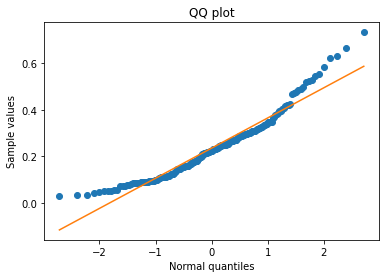

In [7]:
qq, params = stats.probplot(mines[10])
slope, intercept, r = params

plt.scatter(qq[0], qq[1])
plt.plot(qq[0], intercept + slope * qq[0], c='tab:orange')

plt.title('QQ plot')
plt.xlabel('Normal quantiles')
plt.ylabel('Sample values')

plt.show()

### What are the outliers?
- "Normal" samples from a non-normal distribution
- Measurement errors
- Contamination from a different group

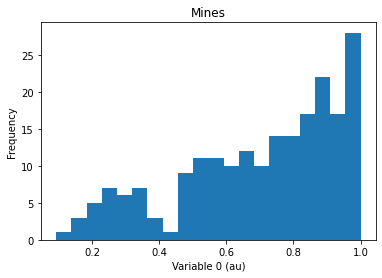

In [8]:
plt.hist(mines[25], bins=20)

plt.title('Mines')
plt.xlabel('Variable 0 (au)')
plt.ylabel('Frequency')

plt.show()

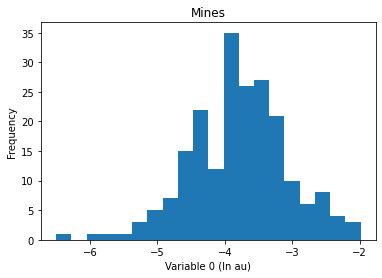

In [9]:
plt.hist(np.log(mines[0]), bins=20)

plt.title('Mines')
plt.xlabel('Variable 0 (ln au)')
plt.ylabel('Frequency')

plt.show()

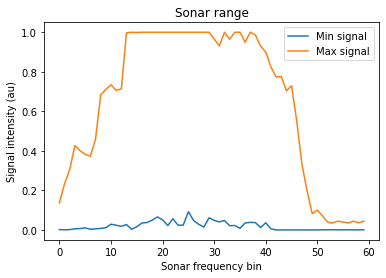

In [10]:
m = mines.apply(min)
M = mines.apply(max)

plt.plot(np.arange(60), m)
plt.plot(np.arange(60), M)

plt.title('Sonar range')
plt.xlabel('Sonar frequency bin')
plt.ylabel('Signal intensity (au)')
plt.legend(['Min signal', 'Max signal'])

plt.show()

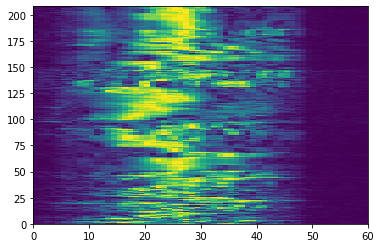

In [11]:
plt.pcolor(mines)

plt.show()

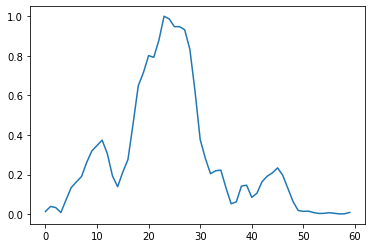

In [12]:
plt.plot(np.arange(60), mines.iloc[200])

plt.show()

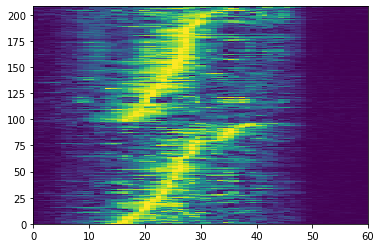

In [13]:
#row_means = mines.apply(lambda x: (x * np.arange(60)).sum() / x.sum(), axis=1)
row_means = mines.idxmax(axis=1)
rock_means = row_means[labels == 'R'].sort_values()
mine_means = row_means[labels == 'M'].sort_values()
sorted_row_idx = np.concatenate([rock_means.index, mine_means.index])
sorted_mines = mines.iloc[sorted_row_idx]

plt.pcolor(sorted_mines)

plt.show()

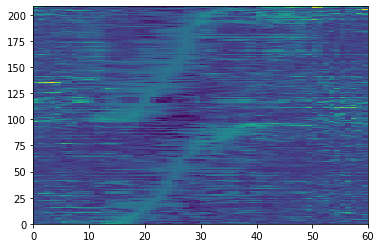

In [14]:
zorted_mines = sorted_mines.apply(stats.zscore)

plt.pcolor(zorted_mines)

plt.show()

## Correlations

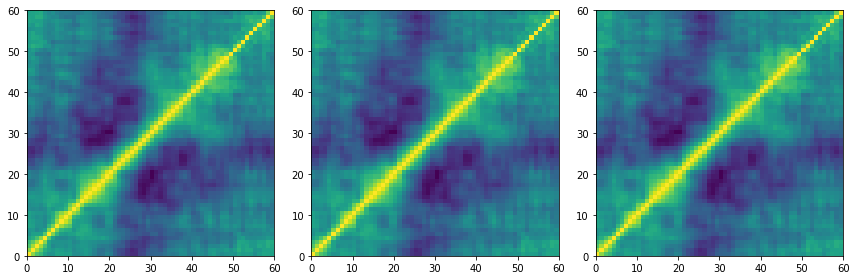

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].pcolor(mines.corr())
ax[1].pcolor(sorted_mines.corr())
ax[2].pcolor(zorted_mines.corr())

plt.tight_layout()
plt.show()

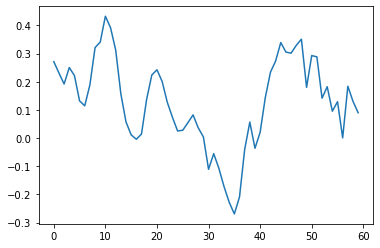

In [16]:
blabels = pd.get_dummies(labels)['M']

corrs = zorted_mines.apply(lambda x: np.corrcoef(x, blabels)[0, 1])

plt.plot(np.arange(60), corrs)

plt.show()

## Model - Logistic Regression
[Andrew Ng on Logistic Regression](https://www.youtube.com/watch?v=t1IT5hZfS48)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(zorted_mines, pd.DataFrame(blabels), test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train['M'])

pred = model.predict(x_test)
print(pred)

[1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 1 1 1 0 1]


In [19]:
acc = np.equal(pred, y_test['M']).mean()
print(acc)

#model.score(x_test, y_test['M'])

0.7142857142857143


[[ 6.68559234e-01  2.28739341e-01 -5.72964389e-01  8.10739892e-01
   2.76385478e-01 -9.00302791e-02 -6.24083453e-01 -6.52393872e-01
   7.38539733e-01  1.63829769e-01  8.58340709e-01  8.49852886e-01
  -7.63990401e-01 -2.01784237e-01  1.83818137e-05 -5.11030392e-01
  -4.40121961e-01  1.60653317e-01  3.16596415e-01  2.20210570e-01
   6.00836613e-01  2.62849818e-01 -2.39328404e-02  7.77076738e-01
  -1.00315756e-01 -1.11171075e-01  3.51780758e-01 -4.38710306e-01
   7.52962178e-01  6.94424468e-01 -1.29273969e+00  3.95728007e-01
   2.06957380e-01 -5.71935363e-01 -1.55984542e-01 -5.97009709e-01
  -8.15235349e-01  2.09578147e-01  1.34301957e-01 -6.85582452e-01
   8.76557617e-02  2.59762051e-01  2.04093120e-01  9.79586815e-01
   6.84707248e-01  5.22536716e-01  1.81619394e-01  5.54938413e-01
   8.38040422e-01 -9.00149337e-01  5.74905091e-01  4.15282029e-01
   1.12716040e-01  1.77575113e-01  2.69767905e-02  1.99137023e-01
  -5.96879094e-01  7.48191903e-01  5.86207125e-01  7.93508628e-02]]


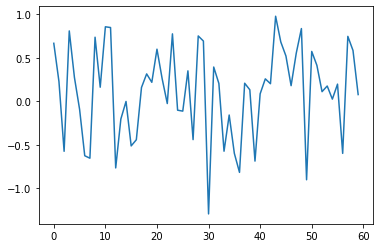

In [20]:
print(model.coef_)

plt.plot(np.arange(60), model.coef_.reshape(-1, 1))

plt.show()

### Accuracy of a naive classifier
On skewed datasets, even a naive classifier can get high accuracies.

In [21]:
def naive(x):
    return 'Rock'

In [22]:
# Luckily, not our case...
print(blabels.mean())

0.5336538461538461


Sometimes we have different tolerances to **False Positives (Type I errors)** and **False Negatives (Type II errors)**.

E.g. while we can tolerate a false alarm (thinking that a rock is a mine), missing a real mine is unacceptable.

### Other accuracy metrics
Measure the error tradeoff.
- Precision (PPV)
- Recall (TPR)
- F<sub>1</sub> score

In [23]:
def accuracy(pred, y):
    return np.equal(pred, y).mean()

def precision(pred, y):
    tp = (pred * y).sum() # Bitwise "and".
    return tp / pred.sum()

def recall(pred, y):
    tp = (pred * y).sum() # Bitwise "and".
    return tp / y.sum()
    
def f1_score(pred, y):
    '''The harmonic mean between precision and recall'''
    p = precision(pred, y)
    r = recall(pred, y)
    return 2 * p * r / (p + r)

def report(pred, y):
    a = accuracy(pred, y)
    p = precision(pred, y)
    r = recall(pred, y)
    f1 = f1_score(pred, y)
    
    print('Accuracy:', round(a, 2))
    print('Precision:', round(p, 2))
    print('Recall:', round(r, 2))
    print('F1 score:', round(f1, 2))

In [24]:
report(pred, y_test['M'])

Accuracy: 0.71
Precision: 0.75
Recall: 0.68
F1 score: 0.71


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test['M'], pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.75      0.68      0.71        22

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.72      0.71      0.71        42



### Can we do better?

In [26]:
# Remove variables uncorrelated with labels.
filtered_mines = zorted_mines.loc[:, corrs.abs() > 0.1]

x_train, x_test, y_train, y_test = train_test_split(filtered_mines, pd.DataFrame(blabels), test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train['M'])

pred = model.predict(x_test)

report(pred, y_test['M'])

Accuracy: 0.83
Precision: 0.75
Recall: 0.8
F1 score: 0.77


In [27]:
# Remove variables on the "sides".
filtered_mines = zorted_mines.iloc[:, 5:48]

x_train, x_test, y_train, y_test = train_test_split(filtered_mines, pd.DataFrame(blabels), test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train['M'])

pred = model.predict(x_test)

report(pred, y_test['M'])

Accuracy: 0.64
Precision: 0.75
Recall: 0.67
F1 score: 0.71


In [28]:
# Without removing variables on the "sides".
filtered_mines = zorted_mines

x_train, x_test, y_train, y_test = train_test_split(filtered_mines, pd.DataFrame(blabels), test_size=0.2)

#model = LogisticRegression()
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model.fit(x_train, y_train['M'])

pred = model.predict(x_test)

report(pred, y_test['M'])

Accuracy: 0.69
Precision: 0.86
Recall: 0.64
F1 score: 0.73


In [29]:
# Use original scale.
filtered_mines = mines

x_train, x_test, y_train, y_test = train_test_split(filtered_mines, pd.DataFrame(blabels), test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train['M'])

pred = model.predict(x_test)

report(pred, y_test['M'])
# About the same thing.
# Scaling helps some algorithms converge to the optimal solution, but a linear models will always find that solution.

Accuracy: 0.74
Precision: 0.8
Recall: 0.77
F1 score: 0.78


### Output probabilities

In [30]:
model.predict_proba(x_test)

array([[0.4481983 , 0.5518017 ],
       [0.50075414, 0.49924586],
       [0.5890754 , 0.4109246 ],
       [0.4331025 , 0.5668975 ],
       [0.32878631, 0.67121369],
       [0.02914298, 0.97085702],
       [0.41468095, 0.58531905],
       [0.63502416, 0.36497584],
       [0.5122547 , 0.4877453 ],
       [0.5766315 , 0.4233685 ],
       [0.61958565, 0.38041435],
       [0.24498623, 0.75501377],
       [0.58500514, 0.41499486],
       [0.02759371, 0.97240629],
       [0.40127149, 0.59872851],
       [0.37016987, 0.62983013],
       [0.08551151, 0.91448849],
       [0.32122783, 0.67877217],
       [0.3713958 , 0.6286042 ],
       [0.45980444, 0.54019556],
       [0.20450966, 0.79549034],
       [0.56085759, 0.43914241],
       [0.21593479, 0.78406521],
       [0.24720465, 0.75279535],
       [0.38907319, 0.61092681],
       [0.45494636, 0.54505364],
       [0.62453585, 0.37546415],
       [0.55928392, 0.44071608],
       [0.79767126, 0.20232874],
       [0.83027321, 0.16972679],
       [0.

In [31]:
np.equal(model.predict_proba(x_test)[:, 1] > 0.5, model.predict(x_test))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

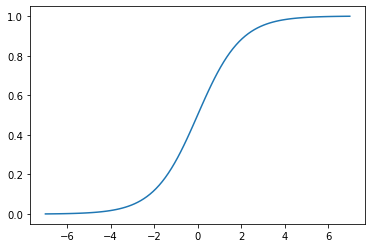

In [32]:
# The sigmoid of logistic function takes any value and squashes it in the (0, 1) interval.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-7, 7, 100)
plt.plot(z, sigmoid(z))

plt.show()

Therefore, the output of a linear model can be interpreted as the logit (or log odds) of the outcome.

$logit_1 = \log{\frac{P_1}{P_2}} = \log{\frac{P_1}{1 - P_1}}$

$P_1 = S(logit_1)$

## Cross-validation
We have split our dataset into train and test sets, but in doing so we have "lost" a number of samples that we can use to fit our model. How can we make use of all samples in training?

#### k-fold cross-validation
- Randomly split the sample into $k$ groups, approximately equally sized.
- Merge $k - 1$ of those groups together to create the train set.
- Use the remaining group as the test set.
- Repeat $k$ times, each time with a different test test.
- Average the performance of the $k$ models on the $k$ different test sets.

The higher is $k$, the more accurate our models (bigger train sets) and the more accurate out estimate (more tests sets to average their performances), but it becomes slower to train (bigger train sets, and more models trained).

The limit of this approach, when $k = n - 1$, being $n$ the number of samples in our dataset, is called **leave-one-out cross-validation**: we train on all samples except one, and test only on the one remaining sample.

In [33]:
# LOOCV
accuracies = []
for i in range(len(mines)):
    x_train, x_test = mines.drop(i), mines.iloc[i]
    y_train, y_test = blabels.drop(i), blabels.iloc[i]

    model = LogisticRegression()
    model.fit(x_train, y_train)

    pred = model.predict(pd.DataFrame(x_test).T)
    accuracies.append(accuracy(pred, y_test))

np.mean(accuracies)
# Why are we measuring accuracy here instead one of the other metrics?

0.7884615384615384